In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
len(df)

7043

In [4]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Force columns to a number by converting it with pands: to_numeric. (Using errors='coerce' will replace all nonnumeric values with NaN

In [7]:
total_charges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [8]:
df[total_charges.isnull()][['customerID', 'TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,
753,3115-CZMZD,
936,5709-LVOEQ,
1082,4367-NUYAO,
1340,1371-DWPAZ,
3331,7644-OMVMY,
3826,3213-VVOLG,
4380,2520-SGTTA,
5218,2923-ARZLG,
6670,4075-WKNIU,


## Set missing values to zero

In [9]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges = df.TotalCharges.fillna(0)

## Uniformity: lowercasing all letters and replacing spces with underscores 

In [10]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [11]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [12]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

## Convert target variable (Churn) from categorical binary variable to numerical variable

In [13]:
df.churn = (df.churn == 'yes').astype(int)

In [14]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

## Split Data for test and train

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [17]:
df_train_full.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


## Split df_train_full dataframe into train and validation

In [18]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

In [19]:
y_train = df_train.churn.values

In [20]:
y_val = df_val.churn.values

In [21]:
del df_train['churn']

In [22]:
del df_val['churn']

# Exploratory Data Analysis

In [23]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [24]:
df_train_full.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [25]:
1521 / 5634

0.26996805111821087

## 27% of customers churned

In [26]:
global_mean = df_train_full.churn.mean()

In [27]:
round(global_mean, 3)

0.27

## Imbalanced dataset - there are 3x as many people who didn't churn as those who did

## Separate Categorical and Numerical variables

In [28]:
categorical = ['gender', 'seniorcitizen', 'partner', 
               'dependents', 'phoneservice', 'multiplelines', 'internetservice', 
               'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 
               'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [29]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature Importance

In [30]:
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()

In [31]:
male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()

In [32]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()

In [33]:
print('gender == female:', round(female_mean, 3))
print('gender == male:', round(male_mean, 3))

gender == female: 0.277
gender == male: 0.263


In [34]:
print('partner == yes:', round(partner_yes, 3))
print('partner == no:', round(partner_no, 3))

partner == yes: 0.205
partner == no: 0.33


## Risk Ratio
risk = group rate / global rate

risk = 27.7% / 27%

In [35]:
27.7 / 27

1.025925925925926

In [36]:
global_mean = df_train_full.churn.mean()

# Compute teh AVG(churn)
df_group = df_train_full.groupby(by='gender').churn.agg(['mean'])

# Calculate the difference betweengroup churn rate and global rate
df_group['diff'] = df_group['mean'] - global_mean

#calculate the risk of churning
df_group['risk'] = df_group['mean'] / global_mean

df_group

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


the churn reate for the gender variable. 

### Now do the same for all categorical variables

In [37]:
from IPython.display import display

#loop over all categorical variables
for col in categorical:
    # Perform groupby for each categorical variable
    df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['rate'] = df_group['mean'] / global_mean
    
    # Display the resulting dataframe
    display(df_group)

,mean,diff,rate
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,rate
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,rate
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,rate
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,rate
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,rate
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,rate
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,rate
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,rate
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,rate
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,rate
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,rate
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,rate
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,rate
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,rate
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,rate
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


## Mutual Information

In [38]:
from sklearn.metrics import mutual_info_score

# create a stand-alone function for calculating mutual information
def calculate_mi(series):
    # use the mutual_info_score function from scikit learn
    return mutual_info_score(series, df_train_full.churn)

# Apply the function from above to each categorical column of the dataset
df_mi = df_train_full[categorical].apply(calculate_mi)

# Sort teh values of the result
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


## We can see that contract, onlinesecurity and techsupport are among the most important features

- contract 	0.098320
- onlinesecurity 	0.063085
- techsupport 	0.061032

## Correlation Coefficient - Pearson's correlation coefficient

In [39]:
df_train_full[numerical].corrwith(df_train_full.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

# Feature Engineering


we will transform all categorical variables to numeric dfeatures

use DictVectorizer which takes in a dictionary and vectorizes it. 

In [40]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [41]:
train_dict

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'two_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'bank_transfer_(automatic)',
  'tenure': 71,
  'monthlycharges': 86.1,
  'totalcharges': 6045.9},
 {'gender': 'female',
  'seniorcitizen': 1,
  'partner': 'yes',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'no',
  'onlinebackup': 'no',
  'deviceprotection': 'yes',
  'techsupport': 'no',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'credit_card_(automatic)',
  'tenure': 60,
  'monthlycharges': 100.5,
  'totalcharges': 6029.0},
 {'gender':

create dictvectorizer and fit it to the list of dictionaries created previously

In [42]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

after fitting the vectorizer, we can use ti for converting the dictionaries to a amatrix by using the transform method

In [43]:
X_train = dv.transform(train_dict)

In [44]:
X_train[0]

array([0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 8.6100e+01, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 7.1000e+01, 6.0459e+03])

to get the names of the olumns use the get_feature_names method

In [45]:
dv.get_feature_names()

/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

## Logistic Regression
Sigmoid Function

In [46]:
def logistic_regression(xi):
    score = bias
    for j in range(n):
        score = score + xi[j] * w[j]
        
    prob = sigmoid(score)
    return prob

In [47]:
import math

def sigmoid(score):
    return 1 / (1 + math.exp(-score))

To learn the weights, we need to train the model 

## Train logistic regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [50]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [51]:
y_pred = model.predict_proba(X_val)

In [52]:
model.predict_proba(X_val)

array([[0.76509452, 0.23490548],
       [0.73114964, 0.26885036],
       [0.68055068, 0.31944932],
       ...,
       [0.94275132, 0.05724868],
       [0.3847724 , 0.6152276 ],
       [0.93872722, 0.06127278]])

### left side is probability that the observation belongs to the negative class, aka customer will not churn and the right side is probability the customer will churn

In [53]:
y_pred = model.predict_proba(X_val)[:, 1]

In [54]:
y_pred >= 0.5

array([False, False, False, ..., False,  True, False])

In [55]:
churn = y_pred >= 0.5

In [56]:
(y_val == churn).mean()

0.8016129032258065

## Model Interpretation

In [57]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.563,
 'contract=one_year': -0.086,
 'contract=two_year': -0.599,
 'dependents=no': -0.03,
 'dependents=yes': -0.092,
 'deviceprotection=no': 0.1,
 'deviceprotection=no_internet_service': -0.116,
 'deviceprotection=yes': -0.106,
 'gender=female': -0.027,
 'gender=male': -0.095,
 'internetservice=dsl': -0.323,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.116,
 'monthlycharges': 0.001,
 'multiplelines=no': -0.168,
 'multiplelines=no_phone_service': 0.127,
 'multiplelines=yes': -0.081,
 'onlinebackup=no': 0.136,
 'onlinebackup=no_internet_service': -0.116,
 'onlinebackup=yes': -0.142,
 'onlinesecurity=no': 0.258,
 'onlinesecurity=no_internet_service': -0.116,
 'onlinesecurity=yes': -0.264,
 'paperlessbilling=no': -0.213,
 'paperlessbilling=yes': 0.091,
 'partner=no': -0.048,
 'partner=yes': -0.074,
 'paymentmethod=bank_transfer_(automatic)': -0.027,
 'paymentmethod=credit_card_(automatic)': -0.136,
 'paymentmethod=electronic_check': 0.175,


## To better understand how the model works, we'll train a smaller model 

In [58]:
small_subset =['contract', 'tenure', 'totalcharges']
train_dict_small = df_train[small_subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

In [59]:
dv_small.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'tenure',
 'totalcharges']

In [60]:
model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_small_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [61]:
model_small.intercept_[0]

-0.5772299133614702

### Check weights

In [62]:
dict(zip(dv_small.get_feature_names(), model_small.coef_[0].round(3)))

/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.866,
 'contract=one_year': -0.327,
 'contract=two_year': -1.117,
 'tenure': -0.094,
 'totalcharges': 0.001}

## above is the weights of each feature

- BIAS - W0 - -0.577
- W1 -month-to-month': 0.866,
- W2 - 'contract=one_year': -0.327,
- W3 - 'contract=two_year': -1.117,
- W4 - 'tenure': -0.094,
- W5 - 'totalcharges': 0.001}

## Classification accuracy

In [63]:
# get the predictions from the model
y_pred = model.predict_proba(X_val)[:, 1]

churn = y_pred >= 0.5
(churn == y_val).mean()

0.8016129032258065

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
# create an array with different thresholds: 
thresholds = np.linspace(0, 1, 11)

# usce accuracy_score to compute accuracy
for t in thresholds:
    churn = y_pred >= t
    acc = accuracy_score(y_val, churn)
    print('%0.2f %0.3f' % (t, acc))

0.00 0.261
0.10 0.595
0.20 0.690
0.30 0.755
0.40 0.782
0.50 0.802
0.60 0.790
0.70 0.774
0.80 0.742
0.90 0.739
1.00 0.739


.50 gives the best accuracy

In [66]:
# create an array with different thresholds: 
thresholds = np.linspace(0, 1, 21)

accuracies = []

# usce accuracy_score to compute accuracy
for t in thresholds:
    acc = accuracy_score(y_val, y_pred >= t)
    accuracies.append(acc)

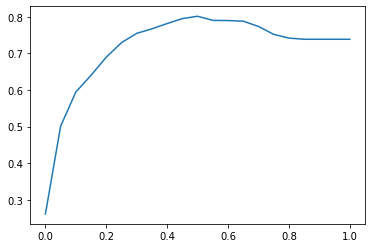

In [67]:
plt.plot(thresholds, accuracies)

In [68]:
val_dict_small = df_val[small_subset].to_dict(orient='records')

X_small_val = dv_small.transform(val_dict_small)
y_pred_small = model_small.predict_proba(X_small_val)[:, 1]

churn_small = y_pred_small >+ 0.5
accuracy_score(y_val, churn_small)

0.7672043010752688

### Dummy Baseline

In [69]:
size_val = len(y_val)
baseline = np.repeat(False, size_val)

In [70]:
accuracy_score(baseline, y_val)

0.7387096774193549

### the accuracy of the baseline model is 74%

## Confusion Table

In [71]:
# make prediction threshold 0.5
t = 0.5
predict_churn = (y_pred >= t)
predict_no_churn = (y_pred < t)

# Get the actual target values
actual_churn = (y_val == 1)
actual_no_churn = (y_val == 0)

# Calculate true and false positives
true_positive = (predict_churn & actual_churn).sum()
false_positive = (predict_churn & actual_no_churn).sum()

# Calculate false and true negatives
false_negative = (predict_no_churn & actual_churn).sum()
true_negative = (predict_no_churn & actual_no_churn).sum()

In [72]:
# put all values together in array
confusion_table = np.array(
[[true_negative, false_positive],
[false_negative, true_positive]])

In [73]:
confusion_table

array([[1202,  172],
       [ 197,  289]])

In [74]:
confusion_table / confusion_table.sum()

array([[0.64623656, 0.09247312],
       [0.10591398, 0.15537634]])

### With confusion matrix we can calculate accuracy

accuracty = (TN + TP) / (TN + TP + FN + FP)

In [75]:
(1202 + 289) / (1202 + 289 + 197 + 172)

0.8016129032258065

## Accuracy is not a god metric with imbalanced datasets, its better to use precision and recall

## Precision = TP / (TP + FP)

In [76]:
P = 289 / (289 + 172)

In [77]:
P

0.6268980477223427

## Recall = TP / (TP + FN)

In [78]:
R = 286 / (289 + 197)

In [79]:
R

0.588477366255144

## ROC curve and AUC score

### for the ROC curve we need FPR and TPR
False positive rate (FPR)
True positive rate (TPR)



### FPR = FP / (FP + TN)
### TPR = TP / (TP + FN)

In [80]:
fpr = 172 / 1374

In [81]:
tpr = 289 / 486

## Compute confusion table for different thresholds

In [82]:
# create a list for results
scores = []

# create array with different threshold values 
thresholds = np.linspace(0, 1, 101)

# Loop and compute confusion table for epredictions at each threshold
for t in thresholds:
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    
    # append results to the scores list
    scores.append((t, tp, fp, fn, tn))

In [83]:
# turn list into padnas df then assign names to columns of df
df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

In [84]:
# selects every 10th record of the df
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,486,1374,0,0
10,0.1,458,726,28,648
20,0.2,421,512,65,862
30,0.3,380,350,106,1024
40,0.4,337,257,149,1117
50,0.5,289,172,197,1202
60,0.6,200,105,286,1269
70,0.7,99,34,387,1340
80,0.8,7,1,479,1373
90,0.9,0,0,486,1374


In [85]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [86]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,458,726,28,648,0.942387,0.528384
20,0.2,421,512,65,862,0.866255,0.372635
30,0.3,380,350,106,1024,0.781893,0.254731
40,0.4,337,257,149,1117,0.693416,0.187045
50,0.5,289,172,197,1202,0.594650,0.125182
60,0.6,200,105,286,1269,0.411523,0.076419
70,0.7,99,34,387,1340,0.203704,0.024745
80,0.8,7,1,479,1373,0.014403,0.000728
90,0.9,0,0,486,1374,0.000000,0.000000


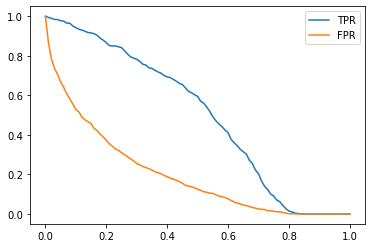

In [87]:
plt.plot(df_scores.threshold, df_scores.tpr, label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label='FPR')
plt.legend()

### Random baseline Model

In [88]:
# fix random seed for reproducibility
np.random.seed(1)
# generate an array with ranomd number between 0 and 1
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [89]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []
    
    thresholds = np.linspace(0, 1, 101)
    
    for t in thresholds:
        tp = ((y_pred >= t) & (y_val == 1)).sum()
        fp = ((y_pred >= t) & (y_val == 0)).sum()
        fn = ((y_pred < t) & (y_val == 1)).sum()
        tn = ((y_pred < t) & (y_val == 0)).sum()
        scores.append((t, tp, fp, fn, tn))
        
    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [90]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [91]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,440,1236,46,138,0.905350,0.899563
20,0.2,392,1101,94,273,0.806584,0.801310
30,0.3,339,972,147,402,0.697531,0.707424
40,0.4,288,849,198,525,0.592593,0.617904
50,0.5,239,723,247,651,0.491770,0.526201
60,0.6,193,579,293,795,0.397119,0.421397
70,0.7,152,422,334,952,0.312757,0.307132
80,0.8,98,302,388,1072,0.201646,0.219796
90,0.9,57,147,429,1227,0.117284,0.106987


### Above is the TPR and FPR values of a random model

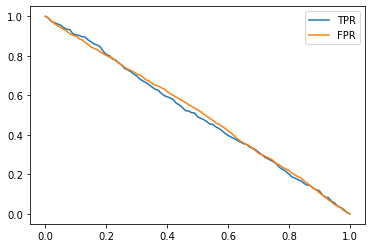

In [92]:
plt.plot(df_rand.threshold, df_rand.tpr, label='TPR')
plt.plot(df_rand.threshold, df_rand.fpr, label='FPR')
plt.legend()

### TPR and FPR of a random classifer decrease from 100% to 0% in a straight line

## Generate Ideal model predictions

In [93]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_pred_ideal = np.linspace(0, 1, num_neg + num_pos)

df_ideal = tpr_fpr_dataframe(y_ideal, y_pred_ideal)

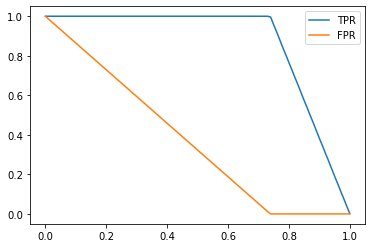

In [94]:
plt.plot(df_ideal.threshold, df_ideal.tpr, label='TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, label='FPR')
plt.legend()

## ROC Curve

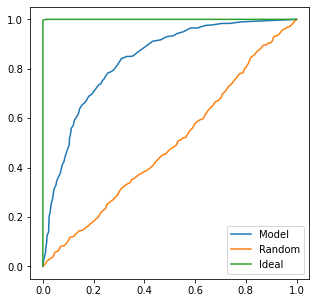

In [95]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot(df_rand.fpr, df_rand.tpr, label='Random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='Ideal')

plt.legend()

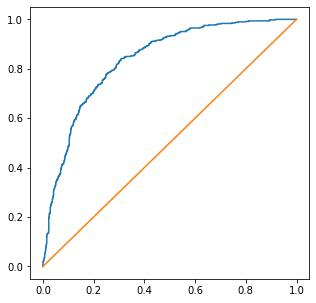

In [96]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, y_pred)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])

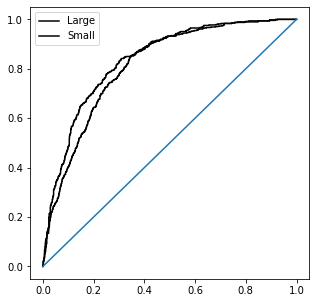

In [97]:
fpr_large, tpr_large, _ = roc_curve(y_val, y_pred)
fpr_small, tpr_small, _ = roc_curve(y_val, y_pred_small)

plt.figure(figsize=(5, 5))

plt.plot(fpr_large, tpr_large, color='black', label='Large')
plt.plot(fpr_small, tpr_small, color='black', label='Small')
plt.plot([0, 1], [0, 1])
plt.legend()

In [98]:
from sklearn.metrics import auc
auc(df_scores.fpr, df_scores.tpr)

0.8359150837721111

In [99]:
auc(df_scores_small.fpr, df_scores_small.tpr)

NameError: name 'df_scores_small' is not defined

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

In [ ]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

np.random.seed(1)
neg_choice = np.random.randint(low=0, high=len(neg), size=10000)
pos_choice = np.random.randint(low=0, high=len(pos), size=10000)
(pos[pos_choice] > neg[neg_choice]).mean()

# Parameter Tuning
## k-folds

In [ ]:
def train(df, y):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)
    
    X = dv.transform(cat)
    
    model = LogisticRegression(solver='liblinear')
    model.fit(X, y)
    
    return dv, model

In [ ]:
def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(cat)
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred

In [ ]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=1)

aucs = []

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]
    
    y_train = df_train.churn.values
    y_val = df_val.churn.values
    
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc)

In [ ]:
print('auc = %0.3f + %0.3f' % (np.mean(aucs), np.std(aucs)))

## Find best parameter

In [ ]:
def train(df, y, C):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)
    
    X = dv.transform(cat)
    
    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X, y)
    
    return dv, model

In [ ]:
nfolds = 5
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)

for C in [0.001, 0.01, 0.1, 0.5, 1, 10]:
    aucs = []
    
    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]
        
        y_train = df_train.churn.values
        y_val = df_val.churn.values
        
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
        
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)
        
    print('C=%s, auc = %0.3f + %0.3f' % (C, np.mean(aucs), np.std(aucs)))

In [ ]:
y_train = df_train_full.churn.values
y_test = df_test.churn.values

dv, model = train(df_train_full, y_train, C=0.5)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
print('auc = %.3f' % auc)

# Deploying machine learning models

## Single customer churn prediction


In [100]:
def predict_single(customer, dv, model):
    X = dv.transform([customer])
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred[0]

In [101]:
import pickle

with open('churn-model.bin', 'wb') as f_out:
    pickle.dump(model, f_out)

In [103]:
f_out = open('churn-model.bin', 'wb')
pickle.dump(model, f_out)
f_out.close()

In [104]:
with open('churn-model.bin', 'wb') as f_out:
    pickle.dump((dv, model), f_out)

In [105]:
with open('churn-model.bin', 'rb') as f_in:
    dv, model = pickle.load(f_in)